## Here, we used new training data generated using a new dispersion that has been updated with the scale factor found by previous models, and generate one set of models with peak information as features and one with spec points as features.


In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [2]:
#Load the training data

subset = 5

peak_names = ['peak1', 'peak2', 'peak3', 'peak4']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4']
width_names = ['width1', 'width2', 'width3','width4']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4']

energy = (pd.read_csv('Training_Data/Hexagon/HexagonBias_v4.csv', header=None)*1000).round().astype(int)
energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]
energy_names2 = energy_names[0::subset]

col_names2 = ['deltaI', 'deltaR']+ peak_names + locs_names + width_names + prom_names

col_names1 = ['deltaI', 'deltaR'] + energy_names

col_names_both = col_names2 + energy_names2



data1 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062218_v8_specPoints.csv', header = None, names = col_names1)
data2 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062218_v8_peakinfo.csv', header = None, names = col_names2)

data = data2.join(data1.drop(['deltaI', 'deltaR'], axis = 1), how = 'left')
data = data[col_names_both]

X1 = data1.drop(['deltaI', 'deltaR'], axis = 1)
Y1 = data1[['deltaI', 'deltaR']]

X2 = data2.drop(['deltaI', 'deltaR'], axis = 1)
Y2 = data2[['deltaI', 'deltaR']]

X = data.drop(['deltaI', 'deltaR'], axis = 1)
Y = data[['deltaI', 'deltaR']]



ts1 = 0.3
rs1 = 42

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ts1, random_state = rs1)

data.head()

,deltaI,deltaR,peak1,peak2,peak3,peak4,loc1,loc2,loc3,loc4,...,E_410_mV,E_420_mV,E_430_mV,E_440_mV,E_450_mV,E_460_mV,E_470_mV,E_480_mV,E_490_mV,E_500_mV
0,0.81472,-0.147980,5.5515,3.6143,2.7947,2.0804,-0.346,-0.220,-0.038,0.194,...,0.80453,0.86287,0.97761,1.15120,1.3650,1.5534,1.6173,1.5188,1.33200,1.14680
1,0.12699,-0.136070,3.0310,2.1081,1.6693,1.3521,-0.354,-0.238,-0.064,0.162,...,1.13110,1.16810,1.18500,1.17920,1.1551,1.1217,1.0879,1.0605,1.04250,1.03410
2,0.63236,-1.417600,9.8176,6.1802,4.6570,3.3744,-0.344,-0.218,-0.034,0.198,...,0.61377,0.59148,0.65554,0.82144,1.1415,1.6858,2.3251,2.4039,1.83050,1.26810
3,0.27850,-0.711760,12.6330,8.4448,6.1732,4.2781,-0.348,-0.224,-0.046,0.182,...,0.55457,0.72143,1.07750,1.79250,2.7945,2.7504,1.7679,1.0971,0.76178,0.60238
4,0.95751,-0.055153,5.6213,3.6863,2.8611,2.1287,-0.346,-0.220,-0.038,0.196,...,0.78903,0.83314,0.93399,1.09780,1.3156,1.5342,1.6481,1.5839,1.39770,1.19400


In [3]:
data1.head()

,deltaI,deltaR,E_-400_mV,E_-398_mV,E_-396_mV,E_-394_mV,E_-392_mV,E_-390_mV,E_-388_mV,E_-386_mV,...,E_482_mV,E_484_mV,E_486_mV,E_488_mV,E_490_mV,E_492_mV,E_494_mV,E_496_mV,E_498_mV,E_500_mV
0,0.81472,-0.147980,0.153720,0.145240,0.140000,0.137220,0.136640,0.137920,0.141120,0.146060,...,1.4851,1.44890,1.4107,1.37140,1.33200,1.29240,1.25390,1.2167,1.18090,1.14680
1,0.12699,-0.136070,0.251030,0.248720,0.250490,0.256280,0.265700,0.279360,0.297530,0.320680,...,1.0560,1.05200,1.0485,1.04540,1.04250,1.04020,1.03810,1.0365,1.03510,1.03410
2,0.63236,-1.417600,0.082531,0.077629,0.074679,0.072960,0.072541,0.073073,0.074672,0.077133,...,2.3197,2.21250,2.0904,1.96040,1.83050,1.70200,1.58070,1.4674,1.36330,1.26810
3,0.27850,-0.711760,0.061303,0.058466,0.056845,0.056249,0.056483,0.057548,0.059468,0.062140,...,1.0084,0.93309,0.8678,0.81111,0.76178,0.71929,0.68261,0.6519,0.62508,0.60238
4,0.95751,-0.055153,0.149530,0.140960,0.135610,0.132660,0.131880,0.132880,0.135740,0.140250,...,1.5529,1.51790,1.4796,1.43910,1.39770,1.35530,1.31340,1.2723,1.23240,1.19400


In [4]:
data2.head()

,deltaI,deltaR,peak1,peak2,peak3,peak4,loc1,loc2,loc3,loc4,width1,width2,width3,width4,prom1,prom2,prom3,prom4
0,0.81472,-0.147980,5.5515,3.6143,2.7947,2.0804,-0.346,-0.220,-0.038,0.194,0.011646,0.023832,0.035493,0.045487,5.3308,3.2358,2.25530,1.36880
1,0.12699,-0.136070,3.0310,2.1081,1.6693,1.3521,-0.354,-0.238,-0.064,0.162,0.018905,0.035562,0.050650,0.068890,2.6371,1.5026,0.88367,0.49701
2,0.63236,-1.417600,9.8176,6.1802,4.6570,3.3744,-0.344,-0.218,-0.034,0.198,0.006878,0.014567,0.022973,0.030591,9.6909,5.9538,4.31700,2.86840
3,0.27850,-0.711760,12.6330,8.4448,6.1732,4.2781,-0.348,-0.224,-0.046,0.182,0.005249,0.010536,0.017181,0.024001,12.5390,8.2725,5.91570,3.85000
4,0.95751,-0.055153,5.6213,3.6863,2.8611,2.1287,-0.346,-0.220,-0.038,0.196,0.011604,0.023561,0.034931,0.044766,5.4064,3.3165,2.33140,1.42650


# Using the Best Models on the Hexagon Data 

## Statsmodels

### Spec Points

 
RMSE on test data: 0.3592175917181596 for  Delta I
R^2 Score on test data: -0.5347841411918581 for Delta I
 
RMSE on test data: 0.23671497118016968 for  Delta R
R^2 Score on test data: 0.7270882050971785 for Delta R
The average residual for predict: 0.0396
Residual is this percent of predict range 0.216 %
The average residual for predict: 0.0301
Residual is this percent of predict range 0.196 %


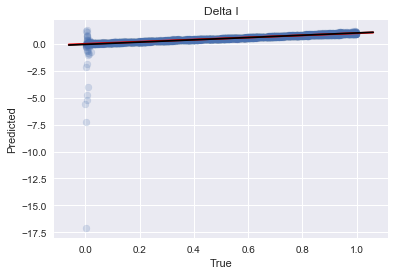

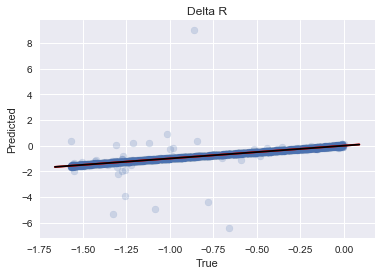

In [5]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_sp = sm.OLS(Y1_train['deltaI'], X1_train)
model_OLS_R_sp = sm.OLS(Y1_train['deltaR'], X1_train)

results_OLS_I_sp = model_OLS_I_sp.fit()
results_OLS_R_sp = model_OLS_R_sp.fit()

#Make predictions on testing data
predictions_OLS_I_sp = results_OLS_I_sp.predict(X1_test) # make the predictions by the model
predictions_OLS_R_sp = results_OLS_R_sp.predict(X1_test)

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y1_test['deltaI'], predictions_OLS_I_sp,'Delta I')
plotSummary(Y1_test['deltaR'], predictions_OLS_R_sp, 'Delta R')

myResiduals(Y1_test['deltaI'], predictions_OLS_I_sp)
myResiduals(Y1_test['deltaR'], predictions_OLS_R_sp)


### peak info

 
RMSE on test data: 0.1323346386185509 for  Delta I
R^2 Score on test data: 0.7917048390615196 for Delta I
 
RMSE on test data: 0.21828061164149556 for  Delta R
R^2 Score on test data: 0.7679395244977487 for Delta R
The average residual for predict: 0.1074
Residual is this percent of predict range 7.089 %
The average residual for predict: 0.1572
Residual is this percent of predict range 2.968 %


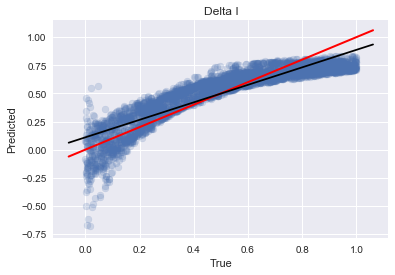

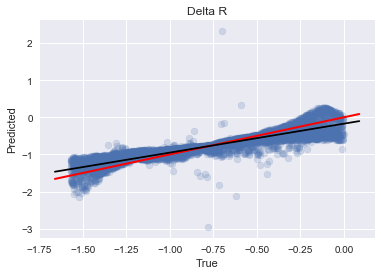

In [6]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_pi = sm.OLS(Y2_train['deltaI'], X2_train)
model_OLS_R_pi = sm.OLS(Y2_train['deltaR'], X2_train)

results_OLS_I_pi = model_OLS_I_pi.fit()
results_OLS_R_pi = model_OLS_R_pi.fit()

#Make predictions on testing data
predictions_OLS_I_pi = results_OLS_I_pi.predict(X2_test) # make the predictions by the model
predictions_OLS_R_pi = results_OLS_R_pi.predict(X2_test)

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y2_test['deltaI'], predictions_OLS_I_pi,'Delta I')
plotSummary(Y2_test['deltaR'], predictions_OLS_R_pi, 'Delta R')

myResiduals(Y2_test['deltaI'], predictions_OLS_I_pi)
myResiduals(Y2_test['deltaR'], predictions_OLS_R_pi)



### spec points and peak info

 
RMSE on test data: 0.05761804270670141 for  Delta I
R^2 Score on test data: 0.9605134571788734 for Delta I
 
RMSE on test data: 0.07144798246634353 for  Delta R
R^2 Score on test data: 0.9751371566733523 for Delta R
The average residual for predict: 0.0314
Residual is this percent of predict range 1.392 %
The average residual for predict: 0.032
Residual is this percent of predict range 0.974 %


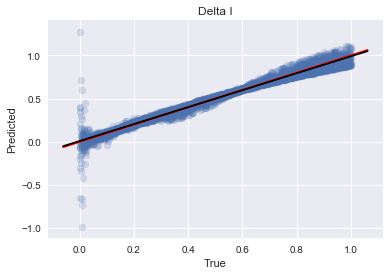

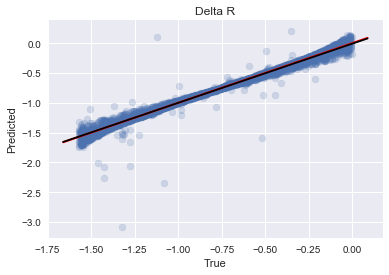

In [7]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_both = sm.OLS(Y_train['deltaI'], X_train)
model_OLS_R_both = sm.OLS(Y_train['deltaR'], X_train)

results_OLS_I_both = model_OLS_I_both.fit()
results_OLS_R_both = model_OLS_R_both.fit()

#Make predictions on testing data
predictions_OLS_I_both = results_OLS_I_both.predict(X_test) # make the predictions by the model
predictions_OLS_R_both = results_OLS_R_both.predict(X_test)

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_test['deltaI'], predictions_OLS_I_both,'Delta I')
plotSummary(Y_test['deltaR'], predictions_OLS_R_both, 'Delta R')

myResiduals(Y_test['deltaI'], predictions_OLS_I_both)
myResiduals(Y_test['deltaR'], predictions_OLS_R_both)

## Decision Tree

### spec points

 
RMSE on test data: 0.010042166635703202 for  deltaI Depth 60
R^2 Score on test data: 0.9988005367221117 for deltaI Depth 60
 
RMSE on test data: 0.010840839473919605 for  deltaR Depth 60
R^2 Score on test data: 0.99942760388031 for deltaR Depth 60


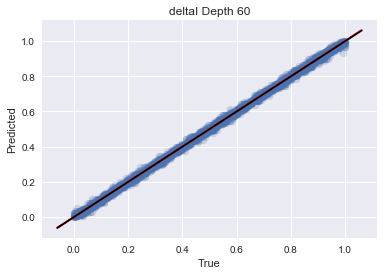

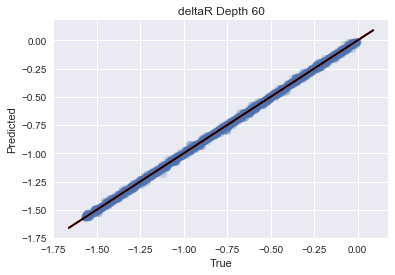

In [8]:
#Initialize the model
rs = 42
regr_DT_sp = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_sp = regr_DT_sp.fit(X1_train, Y1_train)

#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_sp = regr_DT_sp.predict(X1_test)

#Plot results
plotSummary(Y1_test['deltaI'], predictions_DT_sp[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y1_test['deltaR'], predictions_DT_sp[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])


### peak info

 
RMSE on test data: 0.015558326166391823 for  deltaI Depth 60
R^2 Score on test data: 0.9971208926855749 for deltaI Depth 60
 
RMSE on test data: 0.018142982762424698 for  deltaR Depth 60
R^2 Score on test data: 0.9983967980604113 for deltaR Depth 60


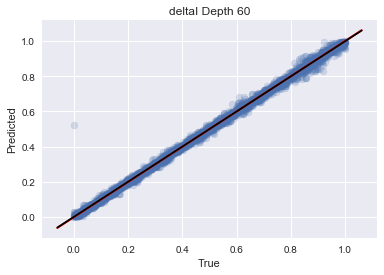

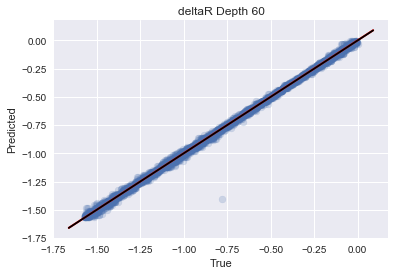

In [9]:
#Initialize the model
rs = 42
regr_DT_pi = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_pi.fit(X2_train, Y2_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_pi = regr_DT_pi.predict(X2_test)

#Plot results
plotSummary(Y2_test['deltaI'], predictions_DT_pi[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y2_test['deltaR'], predictions_DT_pi[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])


### spec points and peak info

 
RMSE on test data: 0.010016053753039328 for  deltaI Depth 60
R^2 Score on test data: 0.9988067665970034 for deltaI Depth 60
 
RMSE on test data: 0.010512329279572099 for  deltaR Depth 60
R^2 Score on test data: 0.9994617689284624 for deltaR Depth 60


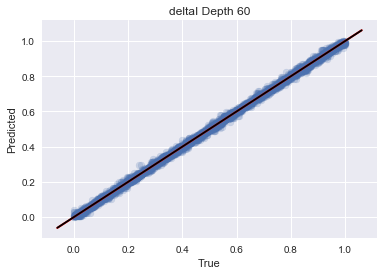

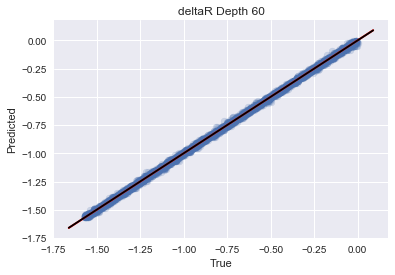

In [10]:
#Initialize the model
rs = 42
regr_DT_both = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_both.fit(X_train, Y_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_both = regr_DT_both.predict(X_test)

#Plot results
plotSummary(Y_test['deltaI'], predictions_DT_both[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y_test['deltaR'], predictions_DT_both[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])


## Random Forest

### spec points

 
RMSE on test data: 0.0037516330244169215 for  deltaI 10
R^2 Score on test data: 0.9998325933100138 for deltaI 10
 
RMSE on test data: 0.003322984030550088 for  deltaR 10
R^2 Score on test data: 0.9999462191871337 for deltaR 10


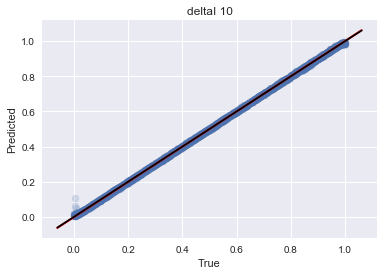

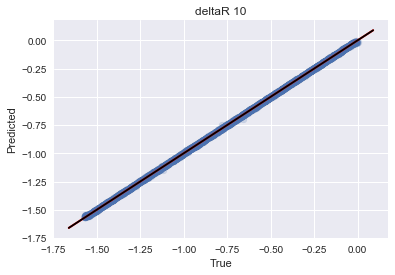

In [11]:
rs = 42
regr_RF_sp = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_sp = regr_RF_sp.fit(X1_train, Y1_train)

predictions_RF_sp = model_RF_sp.predict(X1_test)

plotSummary(Y1_test['deltaI'], predictions_RF_sp[:,0], 'deltaI 10')
plotSummary(Y1_test['deltaR'], predictions_RF_sp[:,1], 'deltaR 10')


### peak info

 
RMSE on test data: 0.01242557641524529 for  deltaI 10
R^2 Score on test data: 0.9981636088198962 for deltaI 10
 
RMSE on test data: 0.01428939992691454 for  deltaR 10
R^2 Score on test data: 0.9990055136276219 for deltaR 10


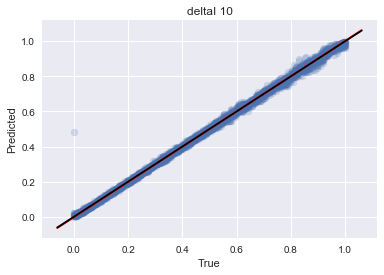

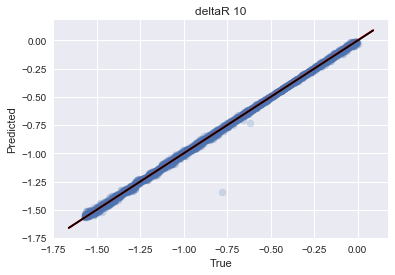

In [12]:
rs = 42
regr_RF_pi = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_pi = regr_RF_pi.fit(X2_train, Y2_train)

predictions_RF_pi = model_RF_pi.predict(X2_test)

plotSummary(Y2_test['deltaI'], predictions_RF_pi[:,0], 'deltaI 10')
plotSummary(Y2_test['deltaR'], predictions_RF_pi[:,1], 'deltaR 10')

### spec points and peak info

 
RMSE on test data: 0.003498744946522445 for  deltaI 10
R^2 Score on test data: 0.9998544015748315 for deltaI 10
 
RMSE on test data: 0.003862743386949719 for  deltaR 10
R^2 Score on test data: 0.9999273287602696 for deltaR 10


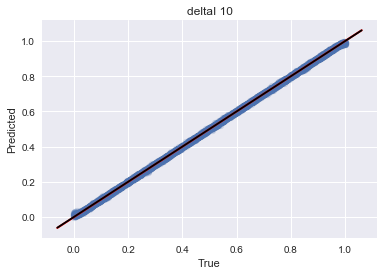

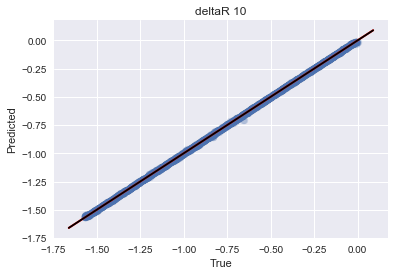

In [13]:
rs = 42
regr_RF_both = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_both = regr_RF_both.fit(X_train, Y_train)

predictions_RF_both = model_RF_both.predict(X_test)

plotSummary(Y_test['deltaI'], predictions_RF_both[:,0], 'deltaI 10')
plotSummary(Y_test['deltaR'], predictions_RF_both[:,1], 'deltaR 10')

## Independent Random Forests

### spec points


Score - Random Forest: 0.9999796722501685 for delta I/R 10
 
RMSE on test data: 0.002042957005055107 for  deltaI 10
R^2 Score on test data: 0.9999796722501685 for deltaI 10
 
RMSE on test data: 0.0025761362458825844 for  deltaR 10
R^2 Score on test data: 0.9999210649723521 for deltaR 10


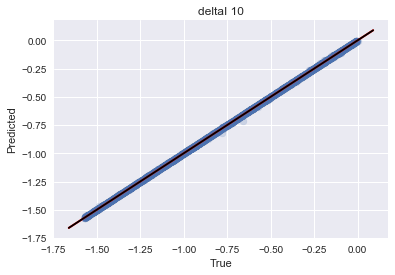

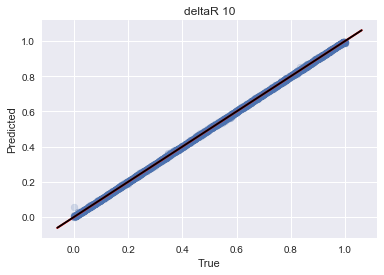

In [14]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

model_RF2_dr_sp = regr_RF2_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_RF2_di_sp = regr_RF2_di_sp.fit(X1_train, Y1_train['deltaI'])

predictions_RF2_dr_sp = model_RF2_dr_sp.predict(X1_test)
predictions_RF2_di_sp = model_RF2_di_sp.predict(X1_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_sp.score(X1_test, Y1_test['deltaR']), 'for delta I/R 10')

plotSummary(Y1_test['deltaR'], predictions_RF2_dr_sp, 'deltaI 10')
plotSummary(Y1_test['deltaI'], predictions_RF2_di_sp, 'deltaR 10')


### peak info


Score - Random Forest: 0.9993056286639779 for delta I/R 10
 
RMSE on test data: 0.011940168771106823 for  deltaI 10
R^2 Score on test data: 0.9993056286639778 for deltaI 10
 
RMSE on test data: 0.009622715098903998 for  deltaR 10
R^2 Score on test data: 0.9988986449063505 for deltaR 10


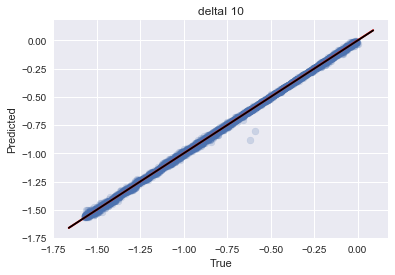

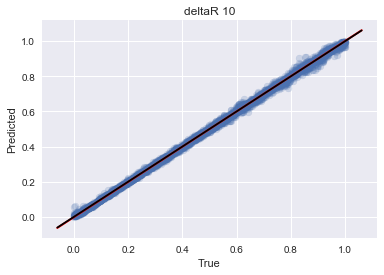

In [15]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

model_RF2_dr_pi = regr_RF2_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_RF2_di_pi = regr_RF2_di_pi.fit(X2_train, Y2_train['deltaI'])

predictions_RF2_dr_pi = model_RF2_dr_pi.predict(X2_test)
predictions_RF2_di_pi = model_RF2_di_pi.predict(X2_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_pi.score(X2_test, Y2_test['deltaR']), 'for delta I/R 10')

plotSummary(Y2_test['deltaR'], predictions_RF2_dr_pi, 'deltaI 10')
plotSummary(Y2_test['deltaI'], predictions_RF2_di_pi, 'deltaR 10')

### spec points and peak info


Score - Random Forest: 0.9999663821816944 for delta I/R 10
 
RMSE on test data: 0.0026272375093789055 for  deltaI 10
R^2 Score on test data: 0.9999663821816944 for deltaI 10
 
RMSE on test data: 0.0029173697969040123 for  deltaR 10
R^2 Score on test data: 0.9998987686393861 for deltaR 10


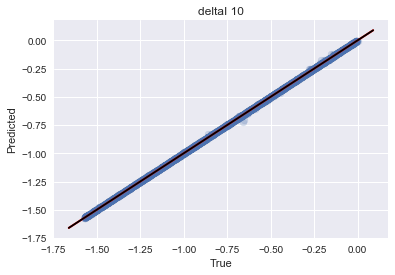

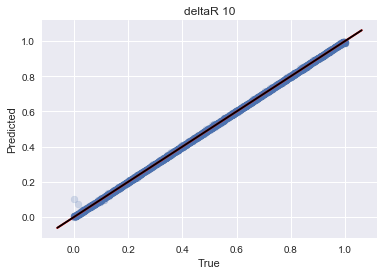

In [16]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

model_RF2_dr_both = regr_RF2_dr_both.fit(X_train, Y_train['deltaR'])
model_RF2_di_both = regr_RF2_di_both.fit(X_train, Y_train['deltaI'])

predictions_RF2_dr_both = model_RF2_dr_both.predict(X_test)
predictions_RF2_di_both = model_RF2_di_both.predict(X_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_both.score(X_test, Y_test['deltaR']), 'for delta I/R 10')

plotSummary(Y_test['deltaR'], predictions_RF2_dr_both, 'deltaI 10')
plotSummary(Y_test['deltaI'], predictions_RF2_di_both, 'deltaR 10')

## AdaBoost Random Forest

### spec points

 
RMSE on test data: 0.002764870907759967 for  AdaBoost Delta I
R^2 Score on test data: 0.9999090753104586 for AdaBoost Delta I
 
RMSE on test data: 0.001967460701751205 for  AdaBoost Delta R
R^2 Score on test data: 0.9999811468906423 for AdaBoost Delta R
Delta I AdaBoost Score: 0.9999090753104586
Delta R AdaBoost Score: 0.9999811468906423


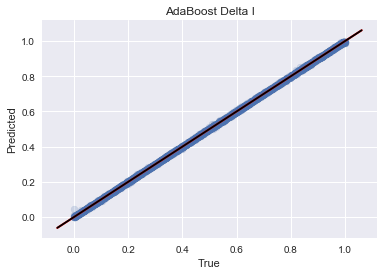

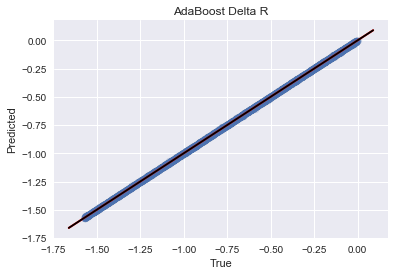

In [17]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB_di_sp = regr_AB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_AB_dr_sp = regr_AB_dr_sp.fit(X1_train, Y1_train['deltaR'])

predictions_AB_di_sp = model_AB_di_sp.predict(X1_test)
predictions_AB_dr_sp = model_AB_dr_sp.predict(X1_test)


plotSummary(Y1_test['deltaI'], predictions_AB_di_sp, 'AdaBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_AB_dr_sp, 'AdaBoost Delta R')

print('Delta I AdaBoost Score:', model_AB_di_sp.score(X1_test, Y1_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_dr_sp.score(X1_test, Y1_test['deltaR']))


### peak info

 
RMSE on test data: 0.010288682306238148 for  AdaBoost Delta I
R^2 Score on test data: 0.9987409249332574 for AdaBoost Delta I
 
RMSE on test data: 0.011538018167259731 for  AdaBoost Delta R
R^2 Score on test data: 0.999351614505161 for AdaBoost Delta R


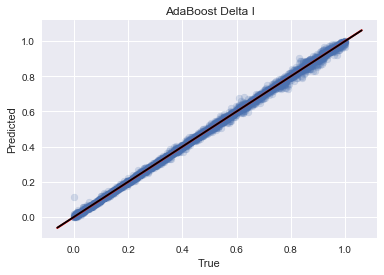

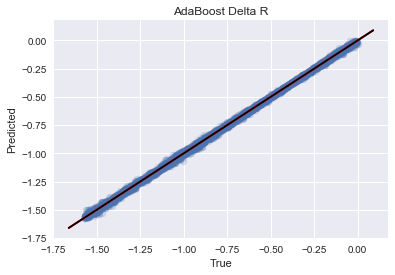

In [18]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB_di_pi = regr_AB_di_pi.fit(X2_train, Y2_train['deltaI'])
model_AB_dr_pi = regr_AB_dr_pi.fit(X2_train, Y2_train['deltaR'])

predictions_AB_di_pi = model_AB_di_pi.predict(X2_test)
predictions_AB_dr_pi = model_AB_dr_pi.predict(X2_test)

plotSummary(Y2_test['deltaI'], predictions_AB_di_pi, 'AdaBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_AB_dr_pi, 'AdaBoost Delta R')


### spec points and peak info

 
RMSE on test data: 0.002531493290908359 for  AdaBoost Delta I
R^2 Score on test data: 0.9999237770644438 for AdaBoost Delta I
 
RMSE on test data: 0.0023987282013881142 for  AdaBoost Delta R
R^2 Score on test data: 0.9999719758185761 for AdaBoost Delta R


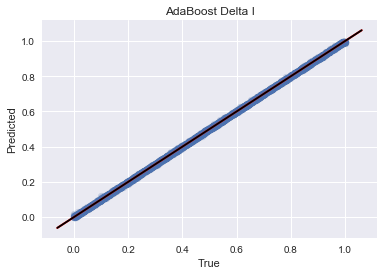

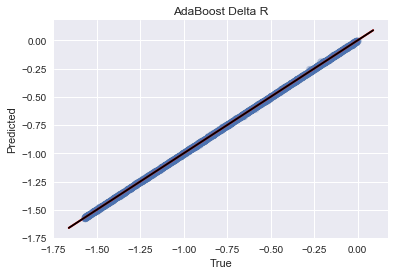

In [19]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB_di_both = regr_AB_di_both.fit(X_train, Y_train['deltaI'])
model_AB_dr_both = regr_AB_dr_both.fit(X_train, Y_train['deltaR'])

predictions_AB_di_both = model_AB_di_both.predict(X_test)
predictions_AB_dr_both = model_AB_dr_both.predict(X_test)

plotSummary(Y_test['deltaI'], predictions_AB_di_both, 'AdaBoost Delta I')
plotSummary(Y_test['deltaR'], predictions_AB_dr_both, 'AdaBoost Delta R')


## Gradient Boosting Random Forest

### spec points

 
RMSE on test data: 0.013117106988931947 for  GradientBoost Delta I
R^2 Score on test data: 0.9979535165780582 for GradientBoost Delta I
 
RMSE on test data: 0.019506323472332943 for  GradientBoost Delta R
R^2 Score on test data: 0.998146802535445 for GradientBoost Delta R


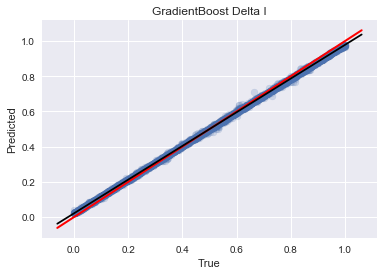

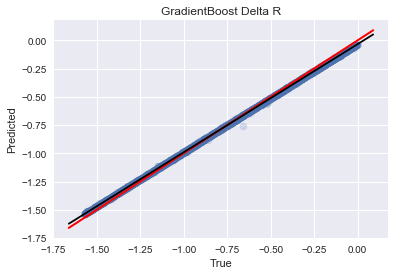

In [20]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30

regr_GB_di_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)

model_GB_di_sp = regr_GB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_GB_dr_sp = regr_GB_dr_sp.fit(X1_train, Y1_train['deltaR'])

predictions_GB_di_sp = model_GB_di_sp.predict(X1_test)
predictions_GB_dr_sp = model_GB_dr_sp.predict(X1_test)

plotSummary(Y1_test['deltaI'], predictions_GB_di_sp, 'GradientBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_GB_dr_sp, 'GradientBoost Delta R')


### peak info

 
RMSE on test data: 0.016696310498640066 for  GradientBoost Delta I
R^2 Score on test data: 0.9966843159933861 for GradientBoost Delta I
 
RMSE on test data: 0.0229189233556662 for  GradientBoost Delta R
R^2 Score on test data: 0.9974416540085005 for GradientBoost Delta R


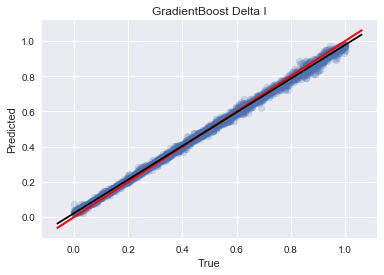

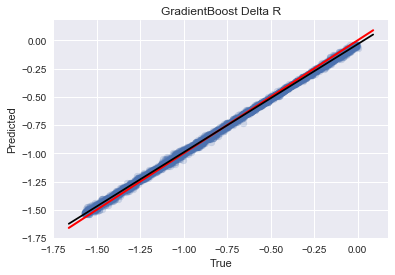

In [21]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30

regr_GB_di_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)

model_GB_di_pi = regr_GB_di_pi.fit(X2_train, Y2_train['deltaI'])

model_GB_dr_pi = regr_GB_dr_pi.fit(X2_train, Y2_train['deltaR'])

predictions_GB_di_pi = model_GB_di_pi.predict(X2_test)
predictions_GB_dr_pi = model_GB_dr_pi.predict(X2_test)

plotSummary(Y2_test['deltaI'], predictions_GB_di_pi, 'GradientBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_GB_dr_pi, 'GradientBoost Delta R')


### spec points and peak info

 
RMSE on test data: 0.012973009750785882 for  GradientBoost Delta I
R^2 Score on test data: 0.9979982326646478 for GradientBoost Delta I
 
RMSE on test data: 0.01947371033802227 for  GradientBoost Delta R
R^2 Score on test data: 0.9981529941741184 for GradientBoost Delta R


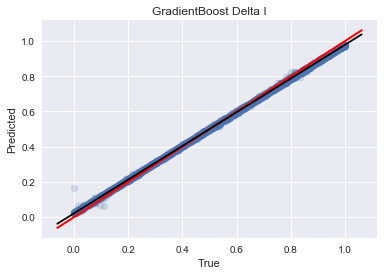

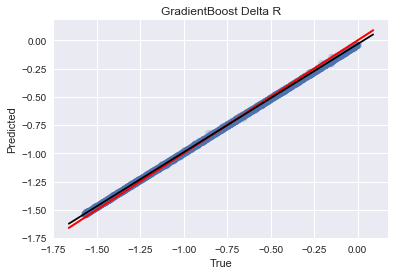

In [22]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30

regr_GB_di_both = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_both = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)

model_GB_di_both = regr_GB_di_both.fit(X_train, Y_train['deltaI'])

model_GB_dr_both = regr_GB_dr_both.fit(X_train, Y_train['deltaR'])

predictions_GB_di_both = model_GB_di_both.predict(X_test)
predictions_GB_dr_both = model_GB_dr_both.predict(X_test)

plotSummary(Y_test['deltaI'], predictions_GB_di_both, 'GradientBoost Delta I')
plotSummary(Y_test['deltaR'], predictions_GB_dr_both, 'GradientBoost Delta R')



## Testing the Models on the Experimental Data



In [29]:
# Load the experimental data
col_names3 = peak_names + locs_names + width_names + prom_names
col_names4 = energy_names

col_names_exp_both = col_names_both[2:]

exp_data_sp = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_specPoints.csv', header = None, names = col_names4)
exp_data_pi = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_peakinfo.csv', header = None, names = col_names3)

exp_data_both = exp_data_sp.join(exp_data_pi, how = 'left')
exp_data_both = exp_data_both[col_names_exp_both]

pred_phase_OLS_R_sp = results_OLS_R_sp.predict(exp_data_sp)
pred_phase_OLS_I_sp = results_OLS_I_sp.predict(exp_data_sp)

pred_phase_OLS_R_pi = results_OLS_R_pi.predict(exp_data_pi)
pred_phase_OLS_I_pi = results_OLS_I_pi.predict(exp_data_pi)

pred_phase_OLS_R_both = results_OLS_R_both.predict(exp_data_both)
pred_phase_OLS_I_both = results_OLS_I_both.predict(exp_data_both)

pred_phase_DT_sp = np.append(regr_DT_sp.predict(exp_data_sp),
                             r2_score(Y1_test['deltaI'], predictions_DT_sp[:,0])).reshape(3,1).T
pred_phase_DT_sp = np.append(pred_phase_DT_sp, 
                             r2_score(Y1_test['deltaR'], predictions_DT_sp[:,1])).reshape(4,1).T

pred_phase_DT_pi = np.append(regr_DT_pi.predict(exp_data_pi), 
                            r2_score(Y1_test['deltaI'], predictions_DT_pi[:,0])).reshape(3,1).T
pred_phase_DT_pi = np.append(pred_phase_DT_pi, 
                            r2_score(Y1_test['deltaR'], predictions_DT_pi[:,1])).reshape(4,1).T
#pred_phase_DT = np.append(pred_phase_DT, r2_score(Y_test['scale_factor'], y_pred_DT[:,2]))

pred_phase_DT_both = np.append(regr_DT_both.predict(exp_data_both), 
                            r2_score(Y_test['deltaI'], predictions_DT_both[:,0])).reshape(3,1).T
pred_phase_DT_both = np.append(pred_phase_DT_both, 
                            r2_score(Y_test['deltaR'], predictions_DT_both[:,1])).reshape(4,1).T

pred_phase_RF_sp = regr_RF_sp.predict(exp_data_sp)
pred_phase_RF_pi = regr_RF_pi.predict(exp_data_pi)
pred_phase_RF_both = regr_RF_both.predict(exp_data_both)

pred_phase_AB_R_sp = model_AB_dr_sp.predict(exp_data_sp)
pred_phase_AB_I_sp = model_AB_di_sp.predict(exp_data_sp)

pred_phase_AB_R_pi = model_AB_dr_pi.predict(exp_data_pi)
pred_phase_AB_I_pi = model_AB_di_pi.predict(exp_data_pi)

pred_phase_AB_R_both = model_AB_dr_both.predict(exp_data_both)
pred_phase_AB_I_both = model_AB_di_both.predict(exp_data_both)

pred_phase_GB_di_sp = model_GB_di_sp.predict(exp_data_sp)
pred_phase_GB_dr_sp = model_GB_dr_sp.predict(exp_data_sp)

pred_phase_GB_di_pi = model_GB_di_pi.predict(exp_data_pi)
pred_phase_GB_dr_pi = model_GB_dr_pi.predict(exp_data_pi)

pred_phase_GB_di_both = model_GB_di_both.predict(exp_data_both)
pred_phase_GB_dr_both = model_GB_dr_both.predict(exp_data_both)

pred_phase_IRF_di_sp = model_RF2_di_sp.predict(exp_data_sp)
pred_phase_IRF_dr_sp = model_RF2_dr_sp.predict(exp_data_sp)

pred_phase_IRF_di_pi = model_RF2_di_pi.predict(exp_data_pi)
pred_phase_IRF_dr_pi = model_RF2_dr_pi.predict(exp_data_pi)

pred_phase_IRF_di_both = model_RF2_di_both.predict(exp_data_both)
pred_phase_IRF_dr_both = model_RF2_dr_both.predict(exp_data_both)

predictedPhases = pd.DataFrame(pred_phase_DT_sp, columns = ['deltaI', 'deltaR', 'deltaI score', 'deltaR score'], index = ['Decision Tree spec points'])

new_test = pd.Series(pred_phase_DT_pi[0], index = ['deltaI', 'deltaR', 'deltaI score', 'deltaR score'], name = 'Decision Tree Peak Info')
predictedPhases = predictedPhases.append(new_test)

new_1 = pd.Series(pred_phase_DT_both[0], index = ['deltaI', 'deltaR', 'deltaI score', 'deltaR score'], name = 'Decision Tree Spec Points and peak info')
predictedPhases = predictedPhases.append(new_1)

predictedPhases.loc['OLS spec points'] = (pred_phase_OLS_I_sp[0], pred_phase_OLS_R_sp[0], r2_score(Y1_test['deltaI'],predictions_OLS_I_sp ), r2_score(Y1_test['deltaR'],predictions_OLS_R_sp ))
predictedPhases.loc['OLS peak info'] = (pred_phase_OLS_I_pi[0], pred_phase_OLS_R_pi[0], r2_score(Y2_test['deltaI'], predictions_OLS_I_pi), r2_score(Y2_test['deltaR'], predictions_OLS_R_pi))
predictedPhases.loc['OLS spec points and peak info'] = (pred_phase_OLS_I_both[0], pred_phase_OLS_R_both[0], r2_score(Y_test['deltaI'], predictions_OLS_I_both), r2_score(Y_test['deltaR'], predictions_OLS_R_both))

predictedPhases.loc['Random Forest spec points'] = (pred_phase_RF_sp[0,0], pred_phase_RF_sp[0,1], r2_score(Y1_test['deltaI'], predictions_RF_sp[:,0]), r2_score(Y1_test['deltaR'], predictions_RF_sp[:,1]))
predictedPhases.loc['Random Forest peak info'] = (pred_phase_RF_pi[0,0], pred_phase_RF_pi[0,1], r2_score(Y2_test['deltaI'], predictions_RF_pi[:,0]), r2_score(Y2_test['deltaR'], predictions_RF_pi[:,1]))
predictedPhases.loc['Random Forest spec points and peak info'] = (pred_phase_RF_both[0,0], pred_phase_RF_both[0,1], r2_score(Y_test['deltaI'], predictions_RF_both[:,0]), r2_score(Y_test['deltaR'], predictions_RF_both[:,1]))


predictedPhases.loc['AdaBoost spec points'] = (pred_phase_AB_I_sp[0], pred_phase_AB_R_sp[0],r2_score(Y1_test['deltaI'], predictions_AB_di_sp), r2_score(Y1_test['deltaR'], predictions_AB_dr_sp))
predictedPhases.loc['AdaBoost peak info'] = (pred_phase_AB_I_pi[0], pred_phase_AB_R_pi[0],r2_score(Y2_test['deltaI'], predictions_AB_di_pi), r2_score(Y2_test['deltaR'], predictions_AB_dr_pi))
predictedPhases.loc['AdaBoost spec points and peak info'] = (pred_phase_AB_I_both[0], pred_phase_AB_R_both[0],r2_score(Y_test['deltaI'], predictions_AB_di_both), r2_score(Y_test['deltaR'], predictions_AB_dr_both))

predictedPhases.loc['Gradient Boosting spec Points'] = (pred_phase_GB_di_sp[0], pred_phase_GB_dr_sp[0],  r2_score(Y1_test['deltaI'], predictions_GB_di_sp), r2_score(Y1_test['deltaR'], predictions_GB_dr_sp))
predictedPhases.loc['Gradient Boosting peak info'] = (pred_phase_GB_di_pi[0], pred_phase_GB_dr_pi[0], r2_score(Y2_test['deltaI'], predictions_GB_di_pi), r2_score(Y2_test['deltaR'], predictions_GB_dr_pi))
predictedPhases.loc['Gradient Boosting spec points and peak info'] = (pred_phase_GB_di_both[0], pred_phase_GB_dr_both[0], r2_score(Y_test['deltaI'], predictions_GB_di_both), r2_score(Y_test['deltaR'], predictions_GB_dr_both))


predictedPhases.loc['Independent Random Forests spec Points'] = (pred_phase_IRF_di_sp[0], pred_phase_IRF_dr_sp[0],  r2_score(Y1_test['deltaI'], predictions_RF2_di_sp ), r2_score(Y1_test['deltaR'], predictions_RF2_dr_sp))
predictedPhases.loc['Independent Random Forests peak info'] = (pred_phase_IRF_di_pi[0], pred_phase_IRF_dr_pi[0], r2_score(Y2_test['deltaI'], predictions_RF2_di_pi), r2_score(Y2_test['deltaR'], predictions_RF2_dr_pi))
predictedPhases.loc['Independent Random Forests spec points and peak info'] = (pred_phase_IRF_di_both[0], pred_phase_IRF_dr_both[0], r2_score(Y_test['deltaI'], predictions_RF2_di_both), r2_score(Y_test['deltaR'], predictions_RF2_dr_both))


predictedPhases2 = predictedPhases.drop(['OLS spec points', 'OLS peak info', 'OLS spec points and peak info'], axis = 0)
predictedPhases2

,deltaI,deltaR,deltaI score,deltaR score
Decision Tree spec points,0.052557,-0.055293,0.998801,0.999428
Decision Tree Peak Info,0.080292,-0.184685,0.997121,0.998397
Decision Tree Spec Points and peak info,0.022211,-0.099812,0.998807,0.999462
Random Forest spec points,0.042191,-0.093350,0.999833,0.999946
Random Forest peak info,0.051863,-0.175746,0.998164,0.999006
Random Forest spec points and peak info,0.042569,-0.096575,0.999854,0.999927
AdaBoost spec points,0.038002,-0.170000,0.999909,0.999981
AdaBoost peak info,0.020536,-0.062475,0.998741,0.999352
AdaBoost spec points and peak info,0.033389,-0.141120,0.999924,0.999972
Gradient Boosting spec Points,0.057034,-0.186876,0.997954,0.998147


In [30]:
#Since this prediction has a score less than 0.99, we will exclude it. 
GoodPredictedPhases = predictedPhases2

deltaI_1 = (GoodPredictedPhases['deltaI']*GoodPredictedPhases['deltaI score']).mean()
deltaR_1 = (GoodPredictedPhases['deltaR']*GoodPredictedPhases['deltaR score']).mean()

print('The weighted average for the predicted phase is: ', deltaR_1, ' + ', deltaI_1, '*i')


The weighted average for the predicted phase is:  -0.1270025399107983  +  0.04410187657179731 *i


In [33]:
predictedPhases[['deltaI', 'deltaR']].to_csv('Model_Results/Hexagon/predictions_v6_threekinds.csv')
predictedPhases[['deltaI score', 'deltaR score']].to_csv('Model_Results/Hexagon/scores_v6_threekinds.csv')



In [34]:
predictedPhases

,deltaI,deltaR,deltaI score,deltaR score
Decision Tree spec points,0.052557,-0.055293,0.998801,0.999428
Decision Tree Peak Info,0.080292,-0.184685,0.997121,0.998397
Decision Tree Spec Points and peak info,0.022211,-0.099812,0.998807,0.999462
OLS spec points,638.121780,559.754423,-0.534784,0.727088
OLS peak info,-1.779790,5.190409,0.791705,0.767940
OLS spec points and peak info,184.969467,-100.747126,0.960513,0.975137
Random Forest spec points,0.042191,-0.093350,0.999833,0.999946
Random Forest peak info,0.051863,-0.175746,0.998164,0.999006
Random Forest spec points and peak info,0.042569,-0.096575,0.999854,0.999927
AdaBoost spec points,0.038002,-0.170000,0.999909,0.999981
